In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, KFold, 
                                     StratifiedKFold, StratifiedShuffleSplit, RepeatedStratifiedKFold)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             classification_report, confusion_matrix, roc_curve, precision_recall_curve,
                             RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay, 
                             make_scorer, average_precision_score, balanced_accuracy_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_columns', None)  # Отображать все колонки

from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler


### Область работы 2 (поиск  модели .... )

In [6]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [7]:
df = pd.read_csv(path_train)

In [8]:
df

,BCS,Age,Sex,Length,Girth,Height,Weight
0,3.0,5-10,stallion,99,114,100,152
1,3.0,5-10,female,91,123,97,173
2,3.0,10-15,gelding,99,123,106,171
3,2.5,2-5,female,92,105,96,121
4,3.0,<2,female,86,105,92,100
...,...,...,...,...,...,...,...
375,3.0,>20,female,94,120,104,152
376,3.0,<2,stallion,68,92,86,72
377,3.0,10-15,female,104,122,101,163
378,3.0,10-15,female,101,125,103,190


In [9]:
df.duplicated().sum()

0

In [10]:
df

,BCS,Age,Sex,Length,Girth,Height,Weight
0,3.0,5-10,stallion,99,114,100,152
1,3.0,5-10,female,91,123,97,173
2,3.0,10-15,gelding,99,123,106,171
3,2.5,2-5,female,92,105,96,121
4,3.0,<2,female,86,105,92,100
...,...,...,...,...,...,...,...
375,3.0,>20,female,94,120,104,152
376,3.0,<2,stallion,68,92,86,72
377,3.0,10-15,female,104,122,101,163
378,3.0,10-15,female,101,125,103,190


In [11]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(380, 7)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
BCS,0,0.0,8
Age,0,0.0,6
Sex,0,0.0,3
Length,0,0.0,40
Girth,0,0.0,42
Height,0,0.0,27
Weight,0,0.0,108


In [12]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)

Числовые колонки: ['BCS', 'Length', 'Girth', 'Height', 'Weight']
Категориальные колонки: ['Age', 'Sex']


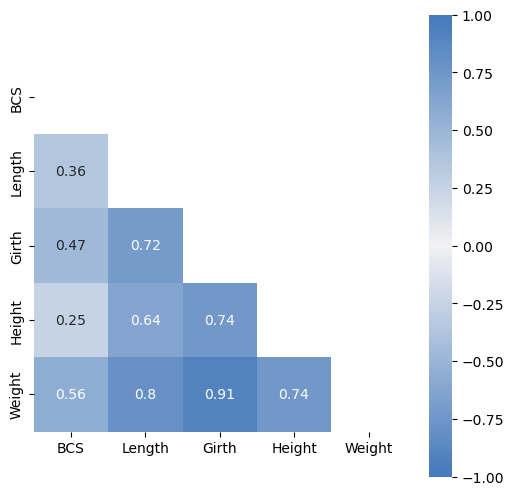

In [13]:
corr = df.drop(['Age', 'Sex'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0, # всегда ставить от -1 до 1 ставим два одинаковых цвета на оба конца
    square=True,
    ax=ax);

In [14]:
# sns.pairplot(df)

In [15]:
df[df['Length'] == 46]

,BCS,Age,Sex,Length,Girth,Height,Weight
142,3.0,<2,stallion,46,66,71,27


In [16]:
# Удаляем строки, где 'Length' равен 46
df = df[df['Length'] != 46]

In [17]:
cat_features = ['Age', 'Sex']
axis_features = ['Length', 'Girth', 'Height']
num_features = ['BCS']

In [18]:
X = df.drop('Weight', axis=1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
power_transformer = PowerTransformer(method='box-cox')
y_train_transformed = power_transformer.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [20]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan)),
    ('polynom', PolynomialFeatures(2, include_bias=False)),
    # ('scaler', MinMaxScaler())
])

# Шаги предварительной обработки для числовых признаков
num_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan)),
    # ('scaler', MinMaxScaler()) 
])

# Шаги предварительной обработки для категориальных признаков
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(sparse_output=False))
])

In [21]:
X_train_axis = axis_transformer.fit_transform(X_train[axis_features])
X_train_num = num_transformer.fit_transform(X_train[num_features])
X_train_cat = cat_transformer.fit_transform(X_train[cat_features])

X_train_processed = np.hstack([X_train_axis, X_train_num, X_train_cat])

In [22]:
X_train = X_train_processed.copy()
y_train = y_train_transformed.copy()

In [23]:
X_test_axis = axis_transformer.transform(X_test[axis_features])
X_test_num = num_transformer.transform(X_test[num_features])
X_test_cat = cat_transformer.transform(X_test[cat_features])
X_test_processed = np.hstack([X_test_axis, X_test_num, X_test_cat])
X_test = X_test_processed.copy()

In [24]:
# oob_scores = []
# train_scores = []
# test_scores = []

# n_estimators = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# # Для GB: min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3
# # Для RF: n_estimators=1000, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9

# for n in n_estimators:
#     # GradientBoostingRegressor
#     # RandomForestRegressor
#     rf = RandomForestRegressor(criterion='squared_error', n_estimators=500, oob_score = True, n_jobs=-1)
#     rf.fit(X_train, y_train)
    
#     oob_scores.append(rf.oob_score_)
    
#     # F-beta для обучающего набора
#     y_train_pred = rf.predict(X_train)
#     score_train = mean_squared_error(y_train, y_train_pred)
#     train_scores.append(score_train)
    
#     # F-beta для тестового набора
#     y_test_pred = rf.predict(X_test)
#     score_test = mean_squared_error(y_test, y_test_pred)
#     test_scores.append(score_test)

# # Построение графиков
# plt.figure(figsize=(15, 5))

# # График OOB-оценки
# plt.subplot(1, 2, 1)
# plt.plot(n_estimators, oob_scores, label='OOB Score', marker='o')
# plt.grid(True)
# plt.legend()

# # График F-beta метрик
# plt.subplot(1, 2, 2)
# plt.plot(n_estimators, train_scores, label='MSE (Train)', marker='o')
# plt.plot(n_estimators, test_scores, label='MSE (Test)', marker='o')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()

In [25]:
# oob_scores = []
# train_scores = []
# test_scores = []

# n_estimators = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# # Для GB: min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3
# # Для RF: n_estimators=1000, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9

# for n in n_estimators:
#     # GradientBoostingRegressor
#     # RandomForestRegressor
#     rf = GradientBoostingRegressor(criterion='squared_error', n_estimators=200, min_samples_leaf=n)
#     rf.fit(X_train, y_train)
        
#     # F-beta для обучающего набора
#     y_train_pred = rf.predict(X_train)
#     score_train = mean_squared_error(y_train, y_train_pred)
#     train_scores.append(score_train)
    
#     # F-beta для тестового набора
#     y_test_pred = rf.predict(X_test)
#     score_test = mean_squared_error(y_test, y_test_pred)
#     test_scores.append(score_test)

# # Построение графиков
# plt.figure(figsize=(15, 5))

# # График F-beta метрик
# plt.subplot(1, 2, 2)
# plt.plot(n_estimators, train_scores, label='MSE (Train)', marker='o')
# plt.plot(n_estimators, test_scores, label='MSE (Test)', marker='o')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()

In [26]:
cat_features = ['Age', 'Sex']
axis_features = ['Length', 'Girth', 'Height', 'BCS']
# num_features = ['BCS']

In [27]:
X = df.drop('Weight', axis=1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
axis_transformer = Pipeline(steps=[
    # ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('polynom', PolynomialFeatures(2, include_bias=False))
    # ('scaler', MinMaxScaler())
])

# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     # ('scaler', MinMaxScaler()) 
# ])

cat = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='most_frequent')), 
    # ('imputer', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('onehot', OneHotEncoder(sparse_output=False))
])


CT = ColumnTransformer([
    ("axis_transformer", axis_transformer, axis_features),
    # ("num", num, num_features),
    ("cat", cat, cat_features),
    # ("drop_columns", "drop", drop_features)  # Указание на удаление колонок
]).set_output(transform='pandas')

display(CT)
ct = CT.fit_transform(X_train)
# ct

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['Length', 'Girth', 'Height', 'BCS']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Age', 'Sex'])])

In [29]:
pipeline = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', RandomForestRegressor(criterion='squared_error', n_estimators=1000, oob_score = True, n_jobs=-1))
])

In [30]:
rf = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=PowerTransformer(method='box-cox')
)

In [31]:
rf.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('axis_transformer',
                                                                                       Pipeline(steps=[('polynom',
                                                                                                        PolynomialFeatures(include_bias=False))]),
                                                                                       ['Length',
                                                                                        'Girth',
                                                                                        'Height',
                                                                                        'BCS']),
                                                                                      ('cat',
                                                                                       Pipeline(steps=[('onehot',
                                                                                                        OneHotEncoder(sparse_output=False))]),
                                                                                       ['Age',
                                                                                        'Sex'])])),
                                                     ('estimator',
                                                      RandomForestRegressor(n_estimators=1000,
                                                                            n_jobs=-1,
                                                                            oob_score=True))]),
                           transformer=PowerTransformer(method='box-cox'))

In [32]:
print('Правильность на OOB: {:.3f}'.format(rf.regressor_.named_steps['estimator'].oob_score_))

Правильность на OOB: 0.878


In [33]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse:.5f}')
print(f'RMSE: {rmse:.5f}')
print(f'MAPE: {mape:.5f}')

MSE: 68.73058
RMSE: 8.29039
MAPE: 0.04350


In [34]:
# sns.pairplot(df)

In [122]:
df

,BCS,Age,Sex,Length,Girth,Height,Weight
0,3.0,5-10,stallion,99,114,100,152
1,3.0,5-10,female,91,123,97,173
2,3.0,10-15,gelding,99,123,106,171
3,2.5,2-5,female,92,105,96,121
4,3.0,<2,female,86,105,92,100
...,...,...,...,...,...,...,...
375,3.0,>20,female,94,120,104,152
376,3.0,<2,stallion,68,92,86,72
377,3.0,10-15,female,104,122,101,163
378,3.0,10-15,female,101,125,103,190


In [35]:
# cat_features = ['Age', 'Sex']
# axis_features = ['Length', 'Girth', 'Height']
# num_features = ['BCS']

In [36]:
# X = df.drop('Weight', axis=1)
# y = df['Weight']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
# axis_transformer = Pipeline(steps=[
#     # ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),
#     ('scaler', StandardScaler())
# ])

# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', StandardScaler()) 
# ])

# cat = Pipeline(steps=[
#     # ('imputer', SimpleImputer(strategy='most_frequent')), 
#     # ('imputer', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('onehot', OneHotEncoder(sparse_output=False))
# ])


# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
#     # ("drop_columns", "drop", drop_features)  # Указание на удаление колонок
# ]).set_output(transform='pandas')

# display(CT)
# ct = CT.fit_transform(X_train)
# # ct

In [38]:
# pipeline = Pipeline(steps=[
#     ('preproc', CT),
#     ('estimator', Ridge(alpha=1.0, solver='auto'))
# ])

In [39]:
# rf = TransformedTargetRegressor(
#     regressor=pipeline,
#     transformer=PowerTransformer(method='box-cox')
# )

In [40]:
# rf.fit(X_train, y_train)

In [41]:
# y_pred = rf.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mape = mean_absolute_percentage_error(y_test, y_pred)

# print(f'MSE: {mse:.5f}')
# print(f'RMSE: {rmse:.5f}')
# print(f'MAPE: {mape:.5f}')

In [42]:
# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),
#     ('scaler', RobustScaler())
# ])

# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
# ])

# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')

# pipeline = Pipeline(steps=[
#     ('preproc', CT),
#     ('estimator', SVR())
# ])

# model_target = TransformedTargetRegressor(
#     regressor=pipeline,
#     transformer=PowerTransformer(method='yeo-johnson')
# )
# model_target.fit(X_train, y_train)

In [43]:
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")


In [44]:
# X_train_transformed = CT.fit_transform(X_train)
# axis_feature_names = CT.named_transformers_['axis_transformer'].named_steps['polynom'].get_feature_names_out(axis_features)
# num_feature_names = num_features
# cat_feature_names = CT.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)
# all_feature_names = np.concatenate([axis_feature_names, num_feature_names, cat_feature_names])
# X_train_transformed.columns = all_feature_names

In [45]:
# rng = np.random.default_rng()

# # Генерируем шумовые признаки для тренировочного набора
# n_samples_train = X_train_transformed.shape[0]
# noise_train = rng.normal(size=(n_samples_train, 15))

# # Создаем DataFrame для шумовых признаков
# noise_features_names = [f'noise_{i}' for i in range(1, 16)]
# noise_train_df = pd.DataFrame(noise_train, columns=noise_features_names, index=X_train_transformed.index)

# # Добавляем шумовые признаки к тренировочному набору данных
# X_train_with_noise = pd.concat([X_train_transformed, noise_train_df], axis=1)

# # То же самое проделываем для тестового набора
# n_samples_test = X_test.shape[0]
# noise_test = rng.normal(size=(n_samples_test, 15))
# noise_test_df = pd.DataFrame(noise_test, columns=noise_features_names, index=X_test.index)

# # Преобразуем тестовые данные
# X_test_transformed = CT.transform(X_test)
# X_test_transformed = np.array(X_test_transformed)  # Преобразуем в плотный массив
# X_test_transformed = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

# # Добавляем шумовые признаки к тестовому набору данных
# X_test_with_noise = pd.concat([X_test_transformed, noise_test_df], axis=1)

In [46]:
# # Обновляем список всех признаков с учетом шумовых признаков
# all_feature_names_with_noise = np.concatenate([all_feature_names, noise_features_names])

In [47]:
# rf = RandomForestRegressor(
#     criterion='squared_error',
#     n_estimators=500,
#     n_jobs=-1
# )

# # Указываем желаемое количество признаков - равное исходному количеству признаков
# n_features_to_select = len(all_feature_names)  # Количество признаков до добавления шума

# rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)
# rfe.fit(X_train_with_noise, y_train)

# # Получаем маску отобранных признаков
# support = rfe.support_

# # Обновляем список всех признаков (с шумовыми признаками)
# all_features_with_noise = np.array(X_train_with_noise.columns)

# # Отобранные признаки
# selected_features = all_features_with_noise[support]
# print("Отобранные признаки:", list(selected_features))

# # Удаленные признаки
# removed_features = all_features_with_noise[~support]
# print("Удаленные признаки (шумовые и, возможно, некоторые исходные):", list(removed_features))

In [48]:
# # Смотрим, сколько шумовых признаков осталось среди отобранных
# noise_in_selected = [feat for feat in selected_features if feat in noise_features_names]
# print(f"Количество шумовых признаков среди отобранных: {len(noise_in_selected)}")
# print("Шумовые признаки среди отобранных:", noise_in_selected)

In [49]:
# # Смотрим, какие исходные признаки были удалены
# original_features = set(all_feature_names)
# removed_original_features = [feat for feat in removed_features if feat in original_features]
# print(f"Количество исходных признаков, удаленных вместо шумовых: {len(removed_original_features)}")
# print("Удаленные исходные признаки:", removed_original_features)

In [50]:
# X_train_selected = X_train_with_noise.loc[:, selected_features]
# X_train_selected = X_train_selected.drop(noise_in_selected, axis=1)
# X_test_selected = X_test_with_noise.loc[:, selected_features]
# X_test_selected = X_test_selected.drop(noise_in_selected, axis=1)

# # Обучаем финальную модель
# rf_final = RandomForestRegressor(
#     criterion='squared_error',
#     n_estimators=1000,
#     n_jobs=-1
# )
# rf_final.fit(X_train_selected, y_train)

# y_pred = rf_final.predict(X_test_selected)
# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE на тестовом наборе: {mse}")

In [51]:
# rng = np.random.default_rng()

# # Предполагаем, что у вас уже есть X_train_transformed и all_feature_names после полиномиальных признаков
# n_samples_train = X_train_transformed.shape[0]
# noise_train = rng.normal(size=(n_samples_train, 10))

# # Создаем имена для шумовых признаков
# noise_features_names = [f'noise_{i}' for i in range(1, 11)]

# # Создаем DataFrame для шумовых признаков с теми же индексами
# noise_train_df = pd.DataFrame(noise_train, columns=noise_features_names, index=X_train_transformed.index)

# # Добавляем шумовые признаки к обучающему набору
# X_train_with_noise = pd.concat([X_train_transformed, noise_train_df], axis=1)

# # Преобразуем тестовые данные с использованием того же ColumnTransformer (CT)
# X_test_transformed = CT.transform(X_test)
# X_test_transformed = np.array(X_test_transformed)  # Преобразуем в плотный массив
# X_test_transformed = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)


# # Генерируем шумовые признаки для тестового набора данных
# n_samples_test = X_test_transformed.shape[0]
# noise_test = rng.normal(size=(n_samples_test, 10))

# # Создаем DataFrame для шумовых признаков тестового набора
# noise_test_df = pd.DataFrame(noise_test, columns=noise_features_names, index=X_test_transformed.index)

# # Добавляем шумовые признаки к тестовому набору
# X_test_with_noise = pd.concat([X_test_transformed, noise_test_df], axis=1)

# all_feature_names_with_noise = np.concatenate([all_feature_names, noise_features_names])


# # Устанавливаем k равным количеству исходных признаков после полиномиальных преобразований
# k = len(all_feature_names)

# # Создаем объект SelectKBest с функцией оценки mutual_info_regression
# selector = SelectKBest(score_func=mutual_info_regression, k=k)

# # Обучаем селектор на обучающих данных с шумовыми признаками
# selector.fit(X_train_with_noise, y_train)

In [52]:
# # Получаем маску отобранных признаков
# support = selector.get_support()

# # Получаем список всех признаков (включая шумовые)
# all_features_with_noise = np.array(X_train_with_noise.columns)

# # Отобранные признаки
# selected_features = all_features_with_noise[support]
# print("Отобранные признаки:", list(selected_features))

# # Удаленные признаки
# removed_features = all_features_with_noise[~support]
# print("Удаленные признаки (шумовые и, возможно, некоторые исходные):", list(removed_features))

# # Проверяем, сколько шумовых признаков было отобрано
# noise_in_selected = [feat for feat in selected_features if feat in noise_features_names]
# print(f"Количество шумовых признаков среди отобранных: {len(noise_in_selected)}")
# print("Шумовые признаки среди отобранных:", noise_in_selected)

# # Проверяем, какие исходные признаки были удалены
# original_features = set(all_feature_names)
# removed_original_features = [feat for feat in removed_features if feat in original_features]
# print(f"Количество исходных признаков, удаленных вместо шумовых: {len(removed_original_features)}")
# print("Удаленные исходные признаки:", removed_original_features)

In [53]:
# # Извлекаем отобранные признаки из обучающего набора
# X_train_selected = X_train_with_noise.loc[:, selected_features]

# # Удаляем шумовые признаки, если они были отобраны
# X_train_selected = X_train_selected.drop(noise_in_selected, axis=1)

# # То же самое для тестового набора
# X_test_selected = X_test_with_noise[selected_features]

# X_test_selected = X_test_selected.drop(noise_in_selected, axis=1)

In [54]:
# # Инициализируем и обучаем финальную модель RandomForestRegressor
# rf_final = RandomForestRegressor(
#     criterion='squared_error',
#     n_estimators=1000,
#     random_state=42
# )
# rf_final.fit(X_train_selected, y_train)

In [55]:
# y_pred = rf_final.predict(X_test_selected)
# mse = mean_squared_error(y_test, y_pred)
# print(f"MSE на тестовом наборе: {mse}")

## Модель без пайплайнов

In [57]:
# X = df.drop('Weight', axis=1)
# y = df['Weight']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
# rf = RandomForestRegressor(
#     criterion='squared_error',
#     n_estimators=1000,
#     random_state=42
# )
# rf.fit(X_train, y_train)